# Imports

In [40]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import math

In [41]:
users = pd.read_csv("datas/users.csv")
users_count = users.shape[0]
users_raw = users.copy()

users

,Num_Acc,place,catu,grav,sex,trip,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01
1876001,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0,C01
1876002,200500087953,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0,A01
1876003,200500087954,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0,A01


In [42]:
users.loc[users.catu == 1, "catu"] = "Driver"
users.loc[users.catu == 2, "catu"] = "Passenger"
users.loc[users.catu == 3, "catu"] = "Pedestrian"
users.loc[users.catu == 4, "catu"] = "Pedestrian in rollerblade or scooter"

users.loc[users.sex == 1, "sex"] = "Male"
users.loc[users.sex == 2, "sex"] = "Female"

users.loc[users.grav == 1, "grav"] = "Unscathed"
users.loc[users.grav == 2, "grav"] = "Killed"
users.loc[users.grav == 3, "grav"] = "Hospitalized wounded"
users.loc[users.grav == 4, "grav"] = "Light injury"

users.loc[users.trip == 1, "trip"] = "Home - work"
users.loc[users.trip == 2, "trip"] = "Home - school"
users.loc[users.trip == 3, "trip"] = "Shopping - Shopping"
users.loc[users.trip == 4, "trip"] = "Professional use"
users.loc[users.trip == 5, "trip"] = "Promenade - leisure"
users.loc[users.trip == 9, "trip"] = "Other"
users.loc[users.trip == 0, "trip"] = "Unknown"

def secu(x):
    if x == "1":
        return "Belt"
    elif x == "2":
        return "Helmet"
    elif x == "3":
        return "Children's device"
    elif x == "4":
        return "Reflective equipment"
    else:
        return "Other"

users["has_secu"] = users.secu.apply(lambda x: True if str(x)[1] == "1" else False)
users["secu"] = users.secu.apply(lambda x: secu(str(x)[0]))

users

,Num_Acc,place,catu,grav,sex,trip,secu,locp,actp,etatp,an_nais,num_veh,has_secu
0,201600000001,1.0,Driver,Unscathed,Female,Unknown,Belt,0.0,0.0,0.0,1983.0,B02,True
1,201600000001,1.0,Driver,Hospitalized wounded,Male,Other,Helmet,0.0,0.0,0.0,2001.0,A01,True
2,201600000002,1.0,Driver,Hospitalized wounded,Male,Promenade - leisure,Belt,0.0,0.0,0.0,1960.0,A01,True
3,201600000002,2.0,Passenger,Hospitalized wounded,Male,Unknown,Belt,0.0,0.0,0.0,2000.0,A01,True
4,201600000002,3.0,Passenger,Hospitalized wounded,Female,Unknown,Belt,0.0,0.0,0.0,1962.0,A01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,Driver,Unscathed,Male,Unknown,Belt,0.0,0.0,0.0,1972.0,B01,False
1876001,200500087953,1.0,Driver,Unscathed,Male,Unknown,Belt,0.0,0.0,0.0,1965.0,C01,False
1876002,200500087953,1.0,Driver,Light injury,Male,Promenade - leisure,Helmet,0.0,0.0,0.0,1990.0,A01,False
1876003,200500087954,1.0,Driver,Light injury,Male,Unknown,Belt,0.0,0.0,0.0,1951.0,A01,False


In [43]:
drivers = users[users.catu == "Driver"]
drivers_raw = users_raw[users_raw.catu == 1]
drivers_count = len(drivers)

In [44]:
def bar(df, x, labels):
    return px.bar(
        x=x,
        y=df * 100,
        text=(df * 100).apply(lambda x: str(math.floor(x)) + "%"),
        range_y=[0, 100],
        labels=labels
    )

def pie(df, column, title=None):
    data = df[column].value_counts() / len(df)
    
    fig = px.pie(
        data,
        title=column if title == None else title,
        values=data,
        names=data.index
    )

    fig.update_traces(textposition="inside", textinfo="percent+label")

    return fig.show()

# Catégorie d'utilisateur lors d'un accident

In [45]:
pie(users, "catu", "User categorie")

# Sexe des concernés par un accident

In [46]:
pie(drivers, "sex", "Sex by accident")

# Voyage effectué

In [47]:
pie(users, "grav", "Gravity of accidents")

# Gravité de l'accident

In [48]:
pie(users, "has_secu", "Had security")

In [49]:
pie(users, "secu", "Security type")

In [50]:
def corr(column1: str, column2: str):
    df_corr_grav_secu = pd.DataFrame(users[[column1, column2]].value_counts(), columns=["count"])
    df_corr_grav_secu["count"] = df_corr_grav_secu["count"] / users_count
    df_corr_grav_secu.reset_index(inplace=True)
    df_corr_grav_secu = df_corr_grav_secu.pivot(index=column1, columns=column2, values="count")
    return df_corr_grav_secu

<AxesSubplot:xlabel='secu', ylabel='grav'>

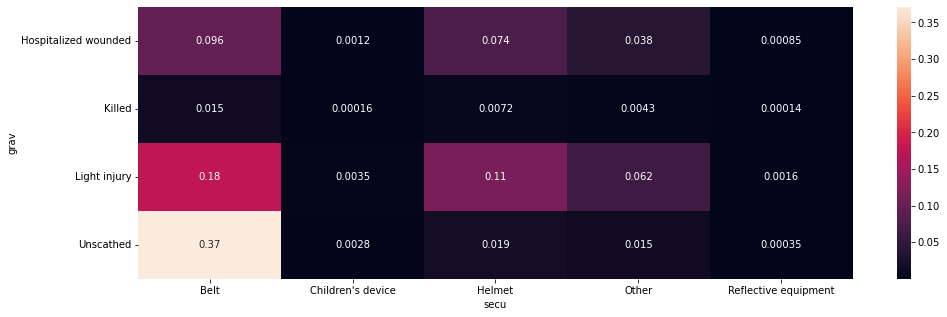

In [51]:
px.imshow(corr("grav", "secu"))

plt.figure(figsize=(16, 5))
sns.heatmap(corr("grav", "secu"), annot=True)

<AxesSubplot:xlabel='has_secu', ylabel='grav'>

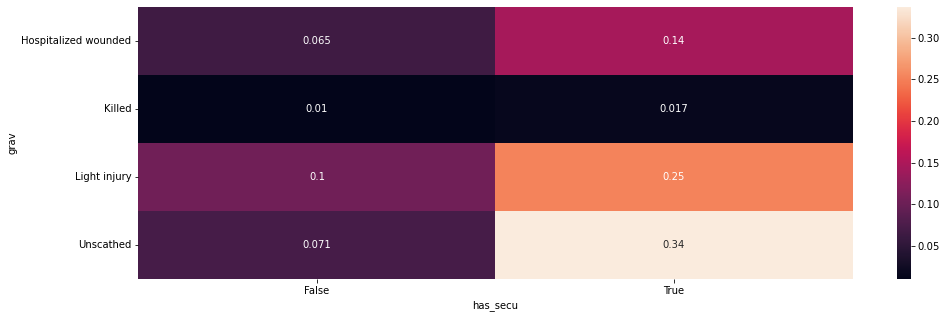

In [52]:
px.imshow(corr("grav", "has_secu"))

plt.figure(figsize=(16, 5))
sns.heatmap(corr("grav", "has_secu"), annot=True)

<AxesSubplot:xlabel='trip', ylabel='grav'>

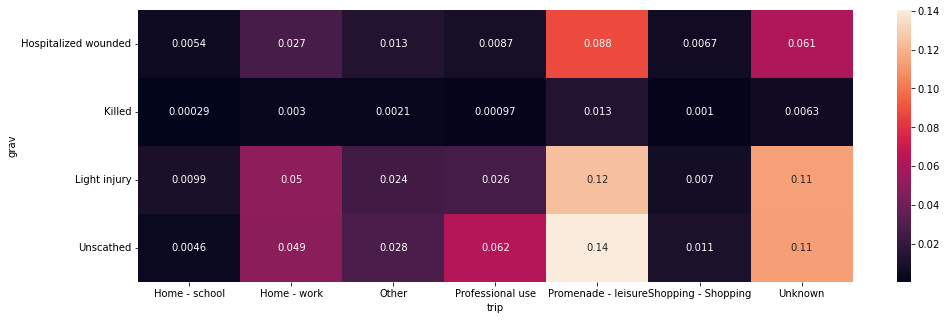

In [53]:
px.imshow(corr("grav", "trip"))

plt.figure(figsize=(16, 5))
sns.heatmap(corr("grav", "trip"), annot=True)

<AxesSubplot:xlabel='sex', ylabel='grav'>

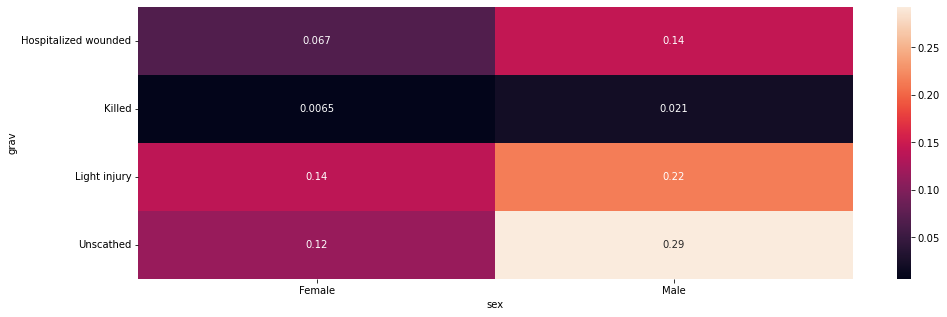

In [54]:
px.imshow(corr("grav", "sex"))

plt.figure(figsize=(16, 5))
sns.heatmap(corr("grav", "sex"), annot=True)